**1. Importing Neccesary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle

**2. Data Loading & Understanding**

In [2]:
df = pd.read_csv("/content/e_learning_leads(7).csv")
df.shape

(12331, 6)

In [94]:
df.columns

Index(['Lead ID', 'Location', 'College', 'Year of Study', 'Program Interest',
       'Lead Source'],
      dtype='object')

In [95]:
df.head()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD0001,City_85,College_45,1st,AI,LinkedIn
1,LD0002,City_62,College_77,4th,ML,Whatsapp
2,LD0003,City_72,College_113,1st,Cyber Security,College Collaboration
3,LD0004,City_100,College_171,4th,Cyber Security,Google Form
4,LD0005,NaN,College_47,4th,Cyber Security,Whatsapp


In [96]:
df.tail()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
12326,LD12327,City_82,College_126,3rd,Robotics,College Collaboration
12327,LD12328,City_74,College_176,3rd,Data Science,Instagram
12328,LD12329,City_54,College_115,3rd,Cyber Security,Mass-Mailing
12329,LD12330,City_70,College_42,1st,ML,LinkedIn
12330,LD12331,City_58,College_127,1st,ML,College Collaboration


In [97]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12331 entries, 0 to 12330
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lead ID           12331 non-null  object
 1   Location          11961 non-null  object
 2   College           11714 non-null  object
 3   Year of Study     12087 non-null  object
 4   Program Interest  11468 non-null  object
 5   Lead Source       11842 non-null  object
dtypes: object(6)
memory usage: 578.1+ KB


In [98]:
df.isnull().sum()

,0
Lead ID,0
Location,370
College,617
Year of Study,244
Program Interest,863
Lead Source,489


In [99]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12331 entries, 0 to 12330
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lead ID           12331 non-null  object
 1   Location          11961 non-null  object
 2   College           11714 non-null  object
 3   Year of Study     12087 non-null  object
 4   Program Interest  11468 non-null  object
 5   Lead Source       11842 non-null  object
dtypes: object(6)
memory usage: 578.1+ KB


In [100]:
for col in df.columns:
  print(col, df[col].unique())
  print("-"*100)

Lead ID ['LD0001' 'LD0002' 'LD0003' ... 'LD12329' 'LD12330' 'LD12331']
----------------------------------------------------------------------------------------------------
Location ['City_85' 'City_62' 'City_72' 'City_100' nan 'City_82' 'City_66'
 'City_39' 'City_90' 'City_80' 'City_4' 'City_47' 'City_55' 'City_16'
 'City_60' 'City_1' 'City_74' 'City_33' 'City_68' 'City_21' 'City_41'
 'City_93' 'City_71' 'City_75' 'City_48' 'City_73' 'City_77' 'City_44'
 'City_67' 'City_87' 'City_42' 'City_64' 'City_53' 'City_83' 'City_14'
 'City_17' 'City_94' 'City_13' 'City_58' 'City_5' 'City_26' 'City_70'
 'City_54' 'City_19' 'City_50' 'City_40' 'City_2' 'City_9' 'City_84'
 'City_69' 'City_52' 'City_63' 'City_30' 'City_43' 'City_24' 'City_91'
 'City_51' 'City_78' 'City_45' 'City_79' 'City_34' 'City_97' 'City_15'
 'City_92' 'City_76' 'City_61' 'City_6' 'City_10' 'City_23' 'City_28'
 'City_98' 'City_46' 'City_89' 'City_8' 'City_18' 'City_86' 'City_99'
 'City_38' 'City_32' 'City_88' 'City_57' 'City_96'

Insights

1. missing values in all columns except "Lead ID" column
2. some unwanted values in "Year of Study", "Progeam Interest" and "Lead Source" column
3. "Lead ID" is unique and don't have any missing value

**3. Exploratory Data Analysis (EDA)**

In [101]:
df.isnull().sum()

,0
Lead ID,0
Location,370
College,617
Year of Study,244
Program Interest,863
Lead Source,489


In [3]:
# removing missing values
df.dropna()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD0001,City_85,College_45,1st,AI,LinkedIn
1,LD0002,City_62,College_77,4th,ML,Whatsapp
2,LD0003,City_72,College_113,1st,Cyber Security,College Collaboration
3,LD0004,City_100,College_171,4th,Cyber Security,Google Form
5,LD0006,City_82,College_54,1st,Data Science,Mass-Mailing
...,...,...,...,...,...,...
12326,LD12327,City_82,College_126,3rd,Robotics,College Collaboration
12327,LD12328,City_74,College_176,3rd,Data Science,Instagram
12328,LD12329,City_54,College_115,3rd,Cyber Security,Mass-Mailing
12329,LD12330,City_70,College_42,1st,ML,LinkedIn


In [103]:
df.describe()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
count,12331,11961,11714,12087,11468,11842
unique,12331,100,194,5,7,8
top,LD0001,City_82,College_113,2nd,Data Science,College Collaboration
freq,1,601,454,3057,2864,2961


In [104]:
df.head()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD0001,City_85,College_45,1st,AI,LinkedIn
1,LD0002,City_62,College_77,4th,ML,Whatsapp
2,LD0003,City_72,College_113,1st,Cyber Security,College Collaboration
3,LD0004,City_100,College_171,4th,Cyber Security,Google Form
4,LD0005,NaN,College_47,4th,Cyber Security,Whatsapp


In [4]:
# Handing outsiders

# Define valid values for each column
valid_year_of_study = ["1st", "2nd", "3rd", "4th"]
valid_program_interest = ["Data Science", "Robotics", "AI", "Electric Vehicle", "Cyber Security", "ML", "statistics"]
valid_lead_source = ["Instagram", "LinkedIn", "College Collaboration", "Google Form", "Mass-Mailing", "Whatsapp"]

# Check initial shape
print("Initial dataset shape:", df.shape)

# Replace outliers with 'Unknown' or a default value
df["Year of Study"] = df["Year of Study"].apply(lambda x: x if isinstance(x, str) and x in valid_year_of_study else "Unkonwn")

df["Program Interest"] = df["Program Interest"].apply(lambda x: x if x in valid_program_interest else "Other")

df["Lead Source"] = df["Lead Source"].apply(lambda x: x if x in valid_lead_source else "Other")

# Save the cleaned dataset
df.to_csv("e_learning_leads_outliers_handled.csv", index=False)

# Check final shape and completion
print("Dataset cleaned and saved as 'e_learning_leads_outliers_handled.csv'")

Initial dataset shape: (12331, 6)
Dataset cleaned and saved as 'e_learning_leads_outliers_handled.csv'


In [5]:
#removeing NaN or blank in 'Location' and 'College' column
df = df.dropna()
df = df[df.ne('').all(axis=1)]

In [107]:
df.head()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD0001,City_85,College_45,1st,AI,LinkedIn
1,LD0002,City_62,College_77,4th,ML,Whatsapp
2,LD0003,City_72,College_113,1st,Cyber Security,College Collaboration
3,LD0004,City_100,College_171,4th,Cyber Security,Google Form
5,LD0006,City_82,College_54,1st,Data Science,Mass-Mailing


In [108]:
df.tail()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
12326,LD12327,City_82,College_126,3rd,Robotics,College Collaboration
12327,LD12328,City_74,College_176,3rd,Data Science,Instagram
12328,LD12329,City_54,College_115,3rd,Cyber Security,Mass-Mailing
12329,LD12330,City_70,College_42,1st,ML,LinkedIn
12330,LD12331,City_58,College_127,1st,ML,College Collaboration


In [6]:
def draw_box_plots(df, column):
  sns.boxplot(x=df[column], width=0.5, dodge=True)

  plt.title(f"Box plot for {column}", fontsize=16)
  plt.xlabel(f"{column}", fontsize=12)
  plt.xticks(rotation=45, fontsize=12)

  plt.show()

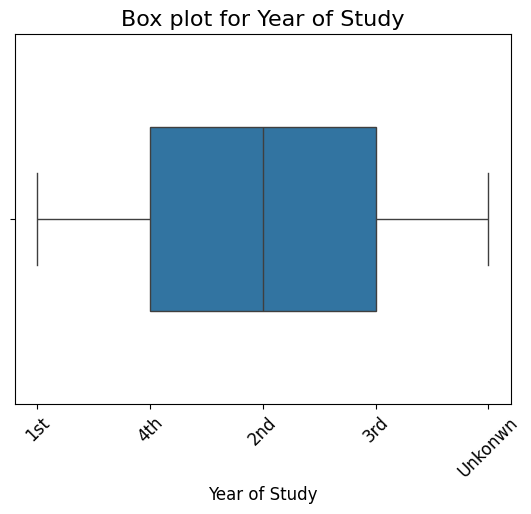

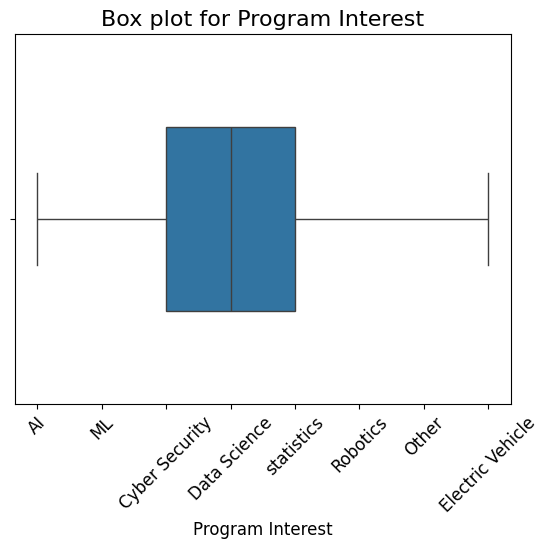

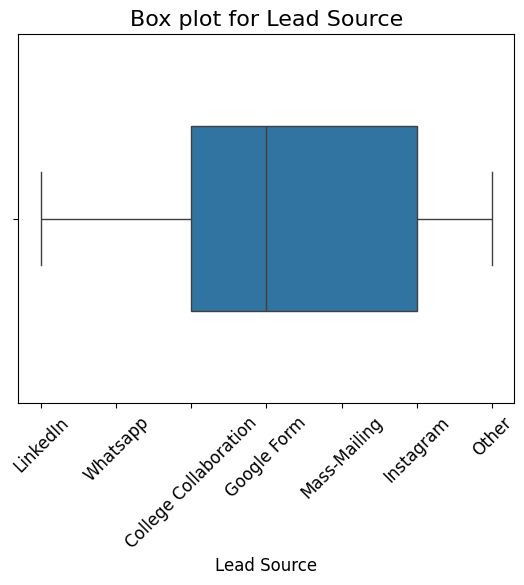

In [7]:
column = ['Year of Study', 'Program Interest', 'Lead Source']
for col in column:
  draw_box_plots(df, col)

In [111]:
df.nunique()

,0
Lead ID,11360
Location,100
College,194
Year of Study,5
Program Interest,8
Lead Source,7


In [112]:
df['College'].value_counts().head()

,count
College,
College_113,441
College_62,402
College_56,229
College_50,212
College_157,204


In [113]:
df['College'].value_counts().tail()

,count
College,
College_106,3
College_98,2
College_109,2
College_36,2
College_172,1


**Demographic Analysis**


Lead Distribution by Location:


<ipython-input-8-3bc4ea2d2a13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values, palette="viridis")


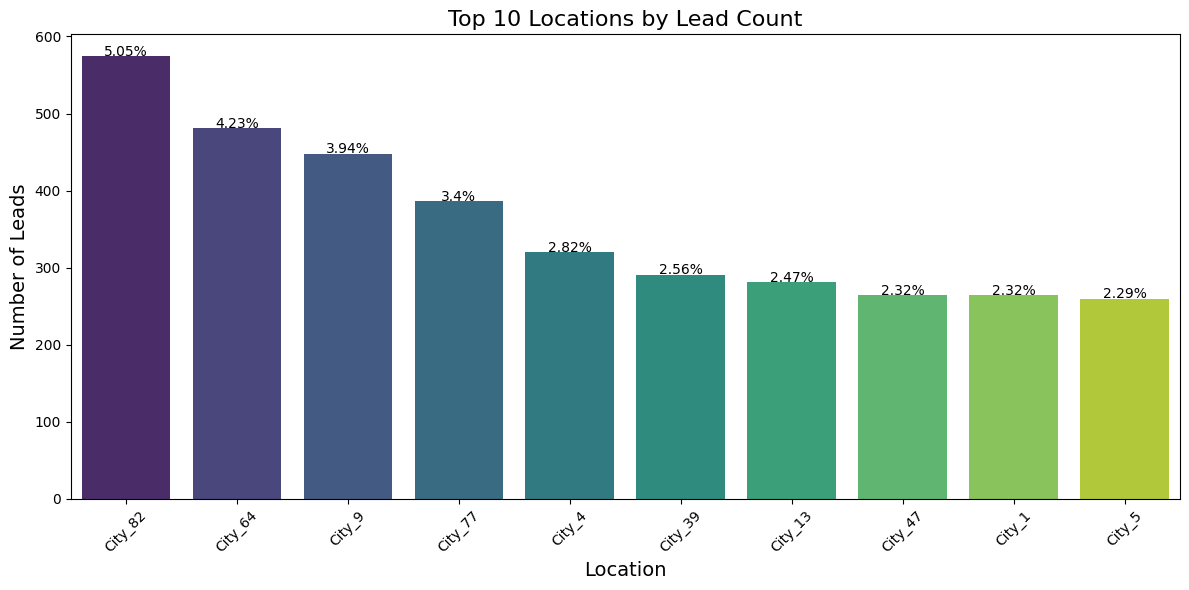


Locations with fewer than 5 leads:
Location
City_12    4
City_36    4
City_7     3
City_95    2
City_22    2
Name: count, dtype: int64


In [8]:
# Section 1: Analysing Lead Sourcing by Location
print("\nLead Distribution by Location:")
location_counts = df["Location"].value_counts()
location_percentages = (location_counts / location_counts.sum() * 100).round(2)

# Plot top 10 locations by lead count
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values, palette="viridis")
plt.title("Top 10 Locations by Lead Count", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Number of Leads", fontsize=14)
plt.xticks(rotation=45)

# Annotate percentages on bars
for index, value in enumerate(location_counts.head(10).values):
    percentage = location_percentages.iloc[index]
    plt.text(index, value + 0.5, f"{percentage}%", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Display locations with fewer than 5 leads (anomalies)
print("\nLocations with fewer than 5 leads:")
print(location_counts[location_counts < 5])


Lead Distribution by College:


<ipython-input-115-45193a9095a5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts.head(10).index, y=college_counts.head(10).values, palette="magma")


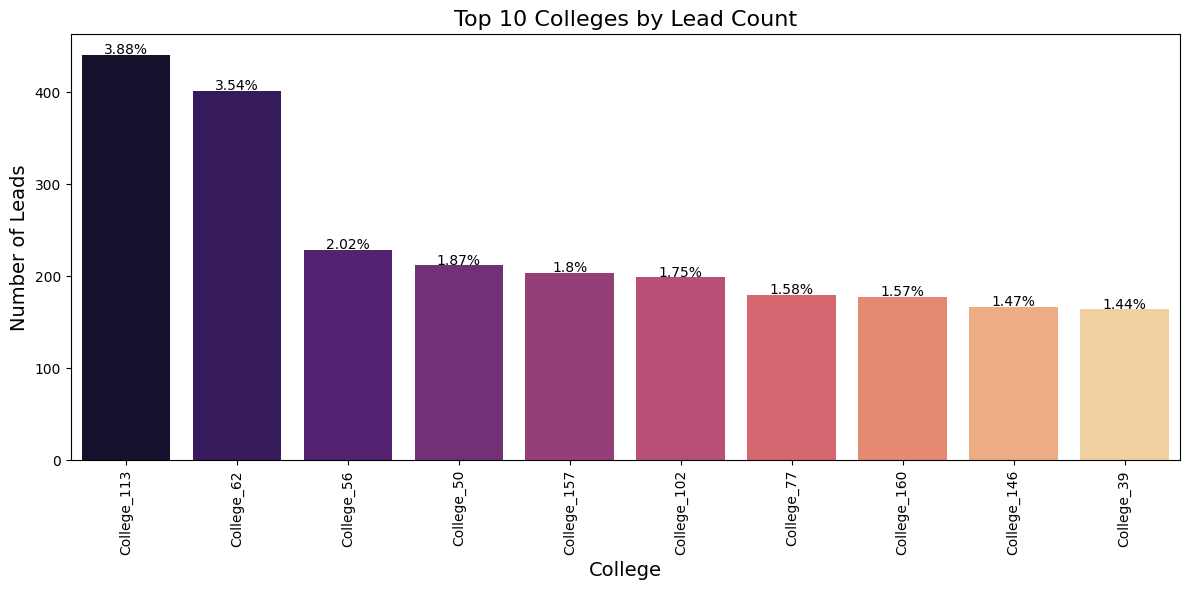


Colleges with fewer than 10 leads:
College
College_186    9
College_11     9
College_168    9
College_192    8
College_18     8
College_43     8
College_130    8
College_197    6
College_136    6
College_140    6
College_191    6
College_55     5
College_59     5
College_5      5
College_58     5
College_83     4
College_144    4
College_141    4
College_150    3
College_175    3
College_104    3
College_106    3
College_98     2
College_109    2
College_36     2
College_172    1
Name: count, dtype: int64


In [115]:
# Section 2: Analysing Lead Sourcing by College
print("\nLead Distribution by College:")
college_counts = df["College"].value_counts()
college_percentages = (college_counts / college_counts.sum() * 100).round(2)

# Plot top 10 colleges by lead count
plt.figure(figsize=(12, 6))
sns.barplot(x=college_counts.head(10).index, y=college_counts.head(10).values, palette="magma")
plt.title("Top 10 Colleges by Lead Count", fontsize=16)
plt.xlabel("College", fontsize=14)
plt.ylabel("Number of Leads", fontsize=14)
plt.xticks(rotation=90)

# Annotate percentages on bars
for index, value in enumerate(college_counts.head(10).values):
    percentage = college_percentages.iloc[index]
    plt.text(index, value + 0.5, f"{percentage}%", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Display colleges with fewer than 10 leads (anomalies)
print("\nColleges with fewer than 10 leads:")
print(college_counts[college_counts < 10])



Lead Distribution by Year of Study:


<ipython-input-116-57f82fd9ba21>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_of_study_counts.index, y=year_of_study_counts.values, palette="coolwarm")


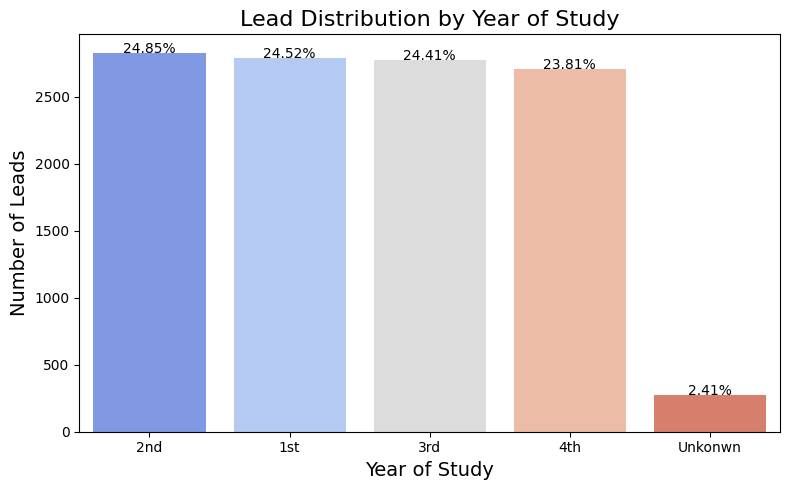


Anomalies in 'Year of Study':
       Lead ID  Location      College Year of Study  Program Interest  \
49      LD0050  City_100   College_69       Unkonwn          Robotics   
59      LD0060   City_70   College_26       Unkonwn        statistics   
75      LD0076   City_64   College_50       Unkonwn                ML   
110     LD0111   City_39  College_199       Unkonwn    Cyber Security   
124     LD0125   City_73    College_3       Unkonwn        statistics   
...        ...       ...          ...           ...               ...   
12161  LD12162   City_63    College_6       Unkonwn    Cyber Security   
12234  LD12235   City_30  College_192       Unkonwn    Cyber Security   
12245  LD12246   City_44  College_183       Unkonwn                ML   
12263  LD12264   City_74   College_56       Unkonwn                ML   
12294  LD12295    City_4   College_50       Unkonwn  Electric Vehicle   

                 Lead Source  
49              Mass-Mailing  
59                 Instagram  

In [116]:
# Section 3: Analysing Lead Sourcing by Year of Study
print("\nLead Distribution by Year of Study:")
year_of_study_counts = df["Year of Study"].value_counts()
year_of_study_percentages = (year_of_study_counts / year_of_study_counts.sum() * 100).round(2)

# Plot distribution by year of study with percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=year_of_study_counts.index, y=year_of_study_counts.values, palette="coolwarm")
plt.title("Lead Distribution by Year of Study", fontsize=16)
plt.xlabel("Year of Study", fontsize=14)
plt.ylabel("Number of Leads", fontsize=14)
plt.xticks(rotation=0)

# Annotate percentages on bars
for index, value in enumerate(year_of_study_counts.values):
    percentage = year_of_study_percentages.iloc[index]
    plt.text(index, value + 0.5, f"{percentage}%", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Highlight anomalies in 'Year of Study'
print("\nAnomalies in 'Year of Study':")
anomalies_year = df[~df["Year of Study"].isin(["1st", "2nd", "3rd", "4th"])]
if not anomalies_year.empty:
    print(anomalies_year)
else:
    print("No anomalies found in 'Year of Study'.")


Insights

1. Top 10 cities contribute 31.44% of total enrolled students in which city_82
   contribute 5.02%.
2. Top 10 colleges contribute 20.96% of total enrolled students.
3. Most of studetns currently in 2nd year of thier respective course.

**Program Analysis**

<ipython-input-117-d1936a0a1b8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=program_interest_percentages.index, y=program_interest_percentages.values, palette="magma")


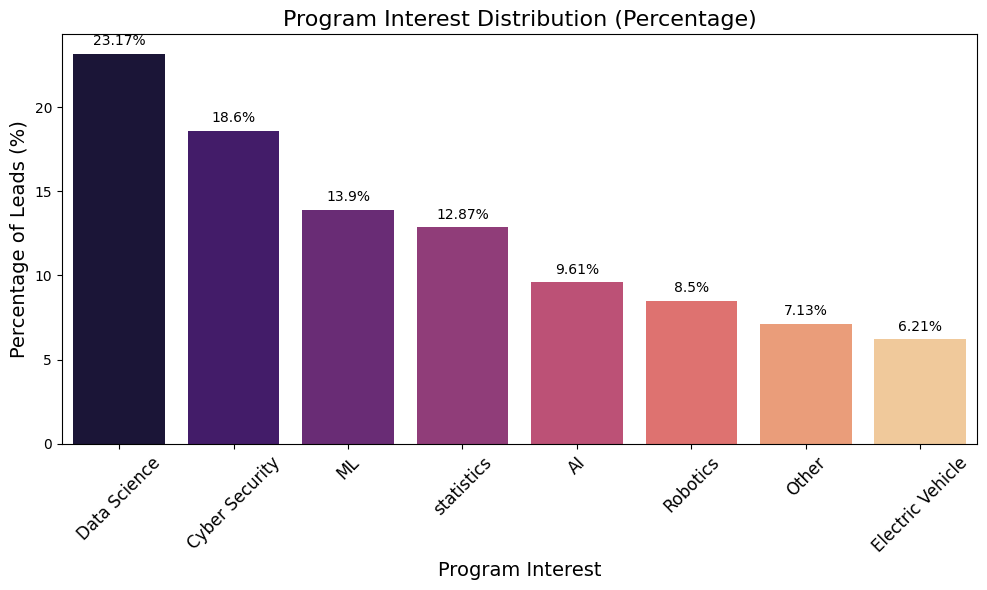

In [117]:
# Calculating percentages for program interest distribution
program_interest_percentages = (df["Program Interest"].value_counts(normalize=True) * 100).round(2)

# Plot program interest with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=program_interest_percentages.index, y=program_interest_percentages.values, palette="magma")
plt.title("Program Interest Distribution (Percentage)", fontsize=16)
plt.xlabel("Program Interest", fontsize=14)
plt.ylabel("Percentage of Leads (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate percentages on bars
for index, value in enumerate(program_interest_percentages.values):
    plt.text(index, value + 0.5, f"{value}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


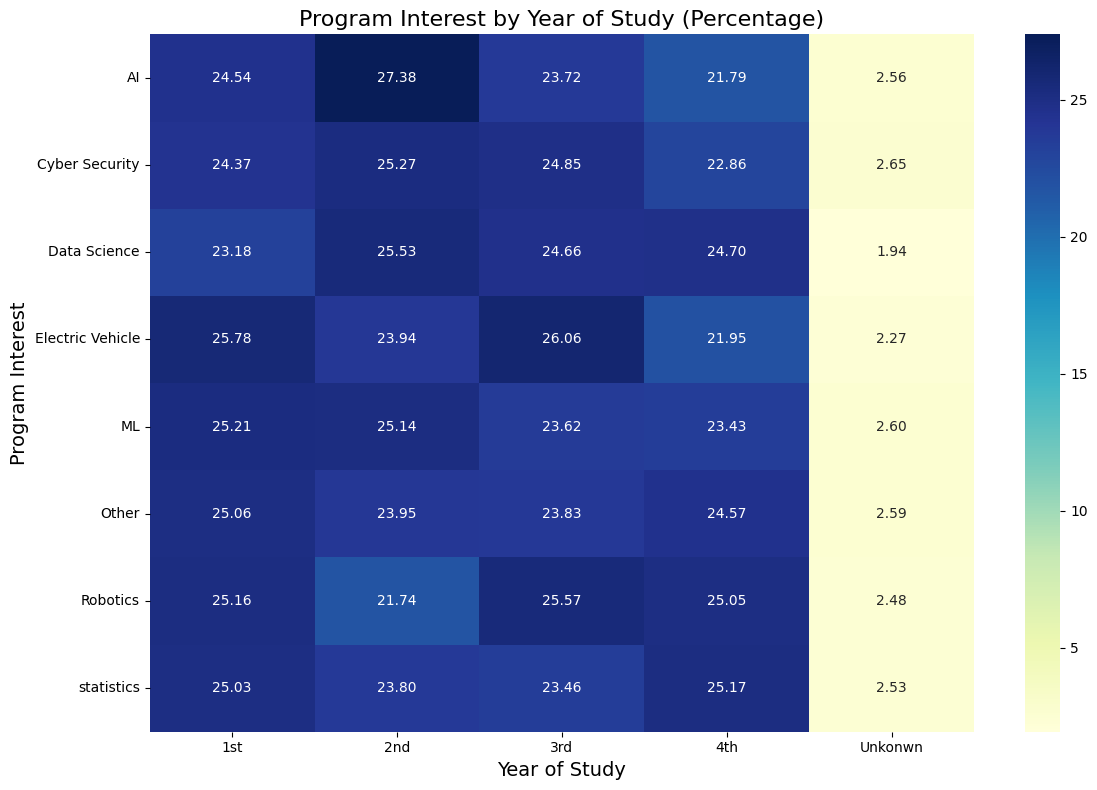

In [118]:
# Calculating percentages for program interest by year of study
program_by_year_percentage = df.groupby(["Program Interest", "Year of Study"]).size().unstack()
program_by_year_percentage = (program_by_year_percentage.div(program_by_year_percentage.sum(axis=1), axis=0) * 100).round(2)

# Plot heatmap with percentages
plt.figure(figsize=(12, 8))
sns.heatmap(program_by_year_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Program Interest by Year of Study (Percentage)", fontsize=16)
plt.xlabel("Year of Study", fontsize=14)
plt.ylabel("Program Interest", fontsize=14)
plt.tight_layout()
plt.show()

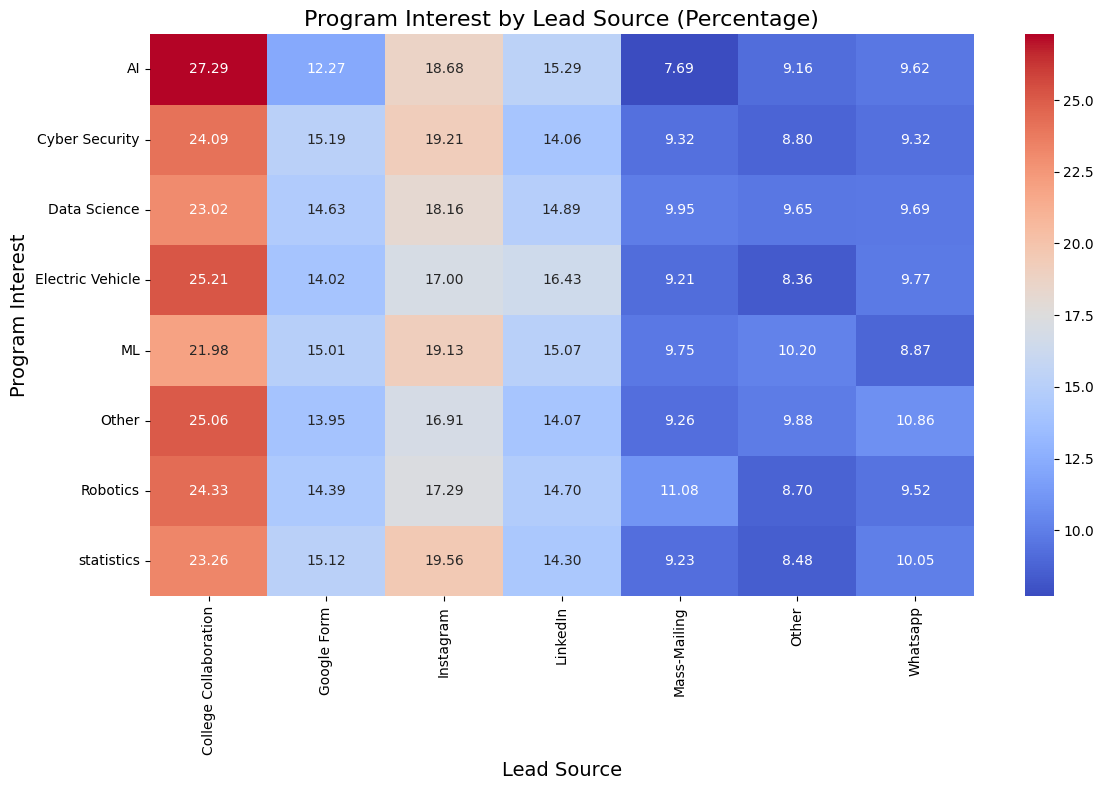

In [119]:
# Calculating percentages for program interest by lead source
program_by_source_percentage = df.groupby(["Program Interest", "Lead Source"]).size().unstack()
program_by_source_percentage = (program_by_source_percentage.div(program_by_source_percentage.sum(axis=1), axis=0) * 100).round(2)

# Plot heatmap with percentages
plt.figure(figsize=(12, 8))
sns.heatmap(program_by_source_percentage, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Program Interest by Lead Source (Percentage)", fontsize=16)
plt.xlabel("Lead Source", fontsize=14)
plt.ylabel("Program Interest", fontsize=14)
plt.tight_layout()
plt.show()

Insights

1. Around 1/4th of total students enrolled in "Data Science" Course.
2. College Collaboration is lead source of Program Interesr followed by Google Form.

In [120]:
# Group data by Program Interest and other demographics

# 1. Program Interest by Location
program_by_location = df.groupby(["Program Interest", "Location"]).size().unstack().fillna(0)
top_locations = program_by_location.idxmax(axis=1)

# 2. Program Interest by College
program_by_college = df.groupby(["Program Interest", "College"]).size().unstack().fillna(0)
top_colleges = program_by_college.idxmax(axis=1)

# 3. Program Interest by Year of Study
program_by_year = df.groupby(["Program Interest", "Year of Study"]).size().unstack().fillna(0)
top_years = program_by_year.idxmax(axis=1)

# 4. Program Interest by Lead Source
program_by_source = df.groupby(["Program Interest", "Lead Source"]).size().unstack().fillna(0)
top_sources = program_by_source.idxmax(axis=1)

# Combine recommendations
recommendations = pd.DataFrame({
    "Top Location": top_locations,
    "Top College": top_colleges,
    "Top Lead Source": top_sources
})

# Display recommendations
print("Recommendations for Targeted Marketing:")
print(recommendations)


Recommendations for Targeted Marketing:
                 Top Location  Top College        Top Lead Source
Program Interest                                                 
AI                     City_9  College_113  College Collaboration
Cyber Security        City_82  College_113  College Collaboration
Data Science          City_82   College_62  College Collaboration
Electric Vehicle      City_82  College_113  College Collaboration
ML                    City_82  College_113  College Collaboration
Other                 City_82   College_62  College Collaboration
Robotics              City_82  College_113  College Collaboration
statistics            City_82  College_113  College Collaboration


**Projections and Predictions**

Lead Conversion Analysis and Budgeting:
             Lead Source  Number of Leads  Conversion Rate  Cost per Lead  \
0  College Collaboration             2716             0.12            100   
1              Instagram             2100             0.10             60   
2               LinkedIn             1675             0.05             50   
3            Google Form             1649             0.07             40   
4               Whatsapp             1093             0.08             30   
5           Mass-Mailing             1079             0.02             20   
6                  Other             1048             0.03             20   

   Potential Conversions  Budget Needed  
0                 325.92         271600  
1                 210.00         126000  
2                  83.75          83750  
3                 115.43          65960  
4                  87.44          32790  
5                  21.58          21580  
6                  31.44          20960  


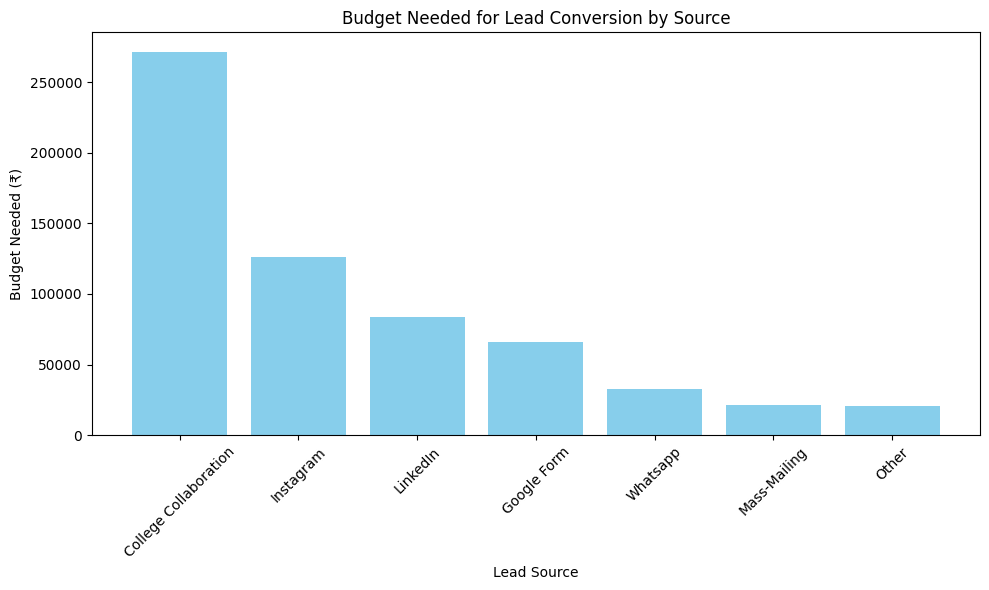

In [9]:
# Budgeting based on "Lead Source"
# Step 1: Define conversion assumptions and budget
conversion_rates = {
    'LinkedIn': 0.05,  # 5% conversion
    'Whatsapp': 0.08,  # 8% conversion
    'College Collaboration': 0.12,  # 12% conversion
    'Google Form': 0.07,  # 7% conversion
    'Instagram': 0.10,  # 10% conversion
    'X': 0.06,  # 6% conversion
    'Mass-Mailing' : 0.02, # 2% conversion
    'Other': 0.03  # 3% conversion
}
costs_per_lead = {
    'LinkedIn': 50,  # ₹50 per lead
    'Whatsapp': 30,  # ₹30 per lead
    'College Collaboration': 100,  # ₹100 per lead
    'Google Form': 40,  # ₹40 per lead
    'Instagram': 60,  # ₹60 per lead
    'X': 35,  # ₹35 per lead
    'Mass-Mailing' : 20, # ₹20 per lead
    'Other': 20  # ₹20 per lead
}

# Step 2: Replace missing values in 'Lead Source' with 'Other'
df['Lead Source'] = df['Lead Source'].fillna('Other')

# Step 3: Calculate potential conversions and budget per source
conversion_analysis = df['Lead Source'].value_counts().reset_index()
conversion_analysis.columns = ['Lead Source', 'Number of Leads']
conversion_analysis['Conversion Rate'] = conversion_analysis['Lead Source'].map(conversion_rates)
conversion_analysis['Cost per Lead'] = conversion_analysis['Lead Source'].map(costs_per_lead)
conversion_analysis['Potential Conversions'] = conversion_analysis['Number of Leads'] * conversion_analysis['Conversion Rate']
conversion_analysis['Budget Needed'] = conversion_analysis['Number of Leads'] * conversion_analysis['Cost per Lead']

# Step 4: Summarize the results
print("Lead Conversion Analysis and Budgeting:")
print(conversion_analysis)

# Step 5: Plot the data (optional visualization)
plt.figure(figsize=(10, 6))
plt.bar(conversion_analysis['Lead Source'], conversion_analysis['Budget Needed'], color='skyblue')
plt.xlabel('Lead Source')
plt.ylabel('Budget Needed (₹)')
plt.title('Budget Needed for Lead Conversion by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Lead Conversion Analysis and Budgeting:
             Lead Source  Number of Leads  Conversion Rate  Cost per Lead  \
0  College Collaboration             2716             0.12            100   
1              Instagram             2100             0.10             60   
2               LinkedIn             1675             0.05             50   
3            Google Form             1649             0.07             40   
4               Whatsapp             1093             0.08             30   
5           Mass-Mailing             1079             0.02             20   
6                  Other             1048             0.03             20   

   Potential Conversions  Budget Needed  
0                 325.92         271600  
1                 210.00         126000  
2                  83.75          83750  
3                 115.43          65960  
4                  87.44          32790  
5                  21.58          21580  
6                  31.44          20960  


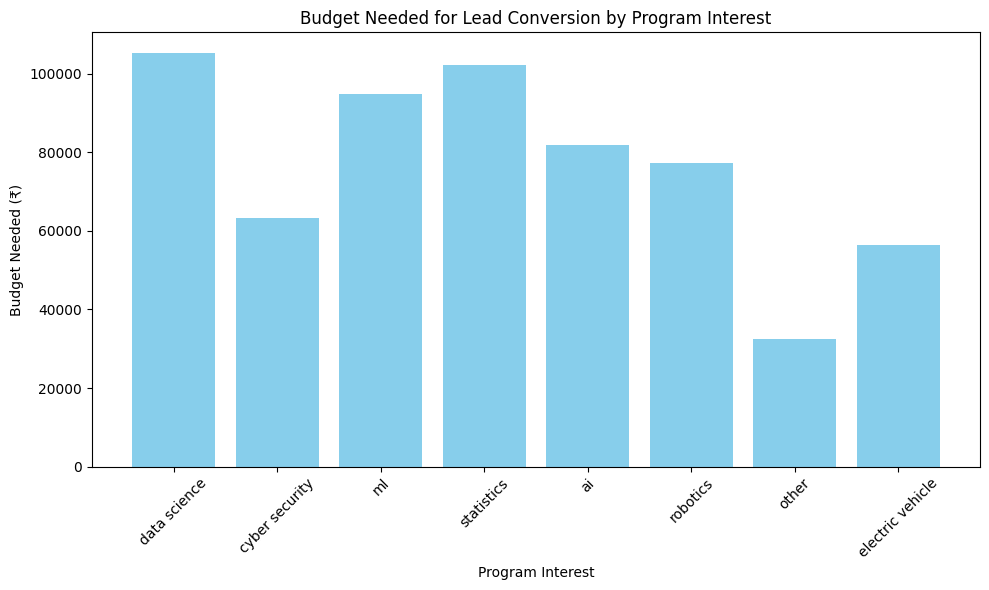

In [130]:
# Budgeting based on "Program Interest"
# Step 1: Clean the 'Program Interest' column
df['Program Interest'] = df['Program Interest'].str.strip().str.lower()

# Step 2: Define standardized conversion rates and costs per program
conversion_rates_program = {
    'data science': 0.2317,  # 23.17% conversion
    'ai': 0.0961,  # 9.61% conversion
    'ml': 0.139, # 13.9% conversion
    'cyber security': 0.186,  # 18.6% conversion
    'statistics': 0.1287,  # 12.87% conversion
    'robotics': 0.09,  # 9% conversion
    'electric vehicle': 0.06,  # 6% conversion
    'other': 0.07  # 7% conversion
}
costs_per_program = {
    'data science': 40,  # ₹40 per lead
    'ai': 75,  # ₹75 per lead
    'ml': 60 , # ₹60 per lead
    'cyber security': 30,  # ₹50 per lead
    'statistics': 70,  # ₹70 per lead
    'robotics': 80,  # ₹80 per lead
    'electric vehicle': 80,  # ₹80 per lead
    'other': 40  # ₹40 per lead
}

# Step 3: Replace missing values in 'Program Interest' with 'other'
df['Program Interest'] = df['Program Interest'].fillna('other')

# Step 4: Calculate potential conversions and budget per program
program_analysis = df['Program Interest'].value_counts().reset_index()
program_analysis.columns = ['Program Interest', 'Number of Leads']
program_analysis['Conversion Rate'] = program_analysis['Program Interest'].map(conversion_rates_program)
program_analysis['Cost per Lead'] = program_analysis['Program Interest'].map(costs_per_program)
program_analysis['Potential Conversions'] = program_analysis['Number of Leads'] * program_analysis['Conversion Rate']
program_analysis['Budget Needed'] = program_analysis['Number of Leads'] * program_analysis['Cost per Lead']

# Step 4: Summarize the results
print("Lead Conversion Analysis and Budgeting:")
print(conversion_analysis)

# Step 5: Plot the data (optional visualization)
plt.figure(figsize=(10, 6))
plt.bar(program_analysis['Program Interest'], program_analysis['Budget Needed'], color='skyblue')
plt.xlabel('Program Interest')
plt.ylabel('Budget Needed (₹)')
plt.title('Budget Needed for Lead Conversion by Program Interest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Budget Allocation for Top 10 Locations:
  Location  Proportional Budget
0  city_82         16069.910200
1  city_64         13442.074255
2   city_9         12559.824483
3  city_77         10811.488295
4   city_4          8981.078184
5  city_39          8146.330715
6  city_13          7844.614763
7  city_47          7403.645294
8   city_1          7412.993331
9   city_5          7328.040481


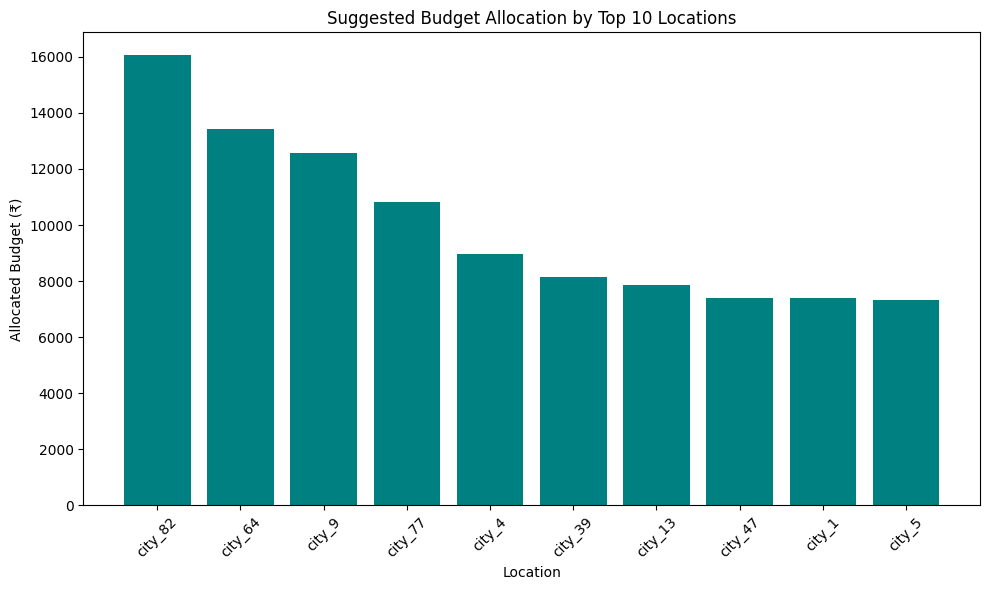

In [133]:
# Budgeting based on top-10 "Location"
top_10_locations = pd.DataFrame({
    'Location': ['city_82', 'city_64', 'city_9', 'city_77', 'city_4', 'city_39', 'city_13', 'city_47', 'city_1', 'city_5'],
    'Number of Leads': [500, 450, 600, 550, 400, 350, 700, 300, 800, 450],
})

# Defining conversion rates and costs per location
conversion_rates_location = {
    'city_82': 0.0505, 'city_64': 0.0423, 'city_9': 0.0394, 'city_77': 0.034, 'city_4': 0.0282,
    'city_39': 0.0256, 'city_13': 0.0247, 'city_47': 0.0232, 'city_1': 0.0232, 'city_5': 0.0229,
}
costs_per_location = {
    'city_82': 80, 'city_64': 90, 'city_9': 70, 'city_77': 85, 'city_4': 75,
    'city_39': 80, 'city_13': 95, 'city_47': 65, 'city_1': 60, 'city_5': 55,
}

# Step 3: Calculating potential conversions and budget per location
top_10_locations['Conversion Rate'] = top_10_locations['Location'].map(conversion_rates_location)
top_10_locations['Cost per Lead'] = top_10_locations['Location'].map(costs_per_location)
top_10_locations['Potential Conversions'] = top_10_locations['Number of Leads'] * top_10_locations['Conversion Rate']
top_10_locations['Budget Needed'] = top_10_locations['Number of Leads'] * top_10_locations['Cost per Lead']

# Step 4: Allocate a marketing budget based on location-specific ROI and conversions
total_budget = 100000  # Define total marketing budget
top_10_locations['ROI'] = top_10_locations['Potential Conversions'] / top_10_locations['Budget Needed']
top_10_locations['Proportional Budget'] = (
    (top_10_locations['ROI'] + top_10_locations['Conversion Rate']) /
    (top_10_locations['ROI'] + top_10_locations['Conversion Rate']).sum()
) * total_budget

# Step 5: Summarize suggested budget allocation
print("Budget Allocation for Top 10 Locations:")
print(top_10_locations[['Location', 'Proportional Budget']])

# Step 6: Visualize the budget allocation
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['Location'], top_10_locations['Proportional Budget'], color='teal')
plt.xlabel('Location')
plt.ylabel('Allocated Budget (₹)')
plt.title('Suggested Budget Allocation by Top 10 Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Budget Allocation for Top 10 Locations:
  Location  Proportional Budget
0  city_82          1606.991020
1  city_64          1344.207425
2   city_9          1255.982448
3  city_77          1081.148829
4   city_4           898.107818
5  city_39           814.633072
6  city_13           784.461476
7  city_47           740.364529
8   city_1           741.299333
9   city_5           732.804048


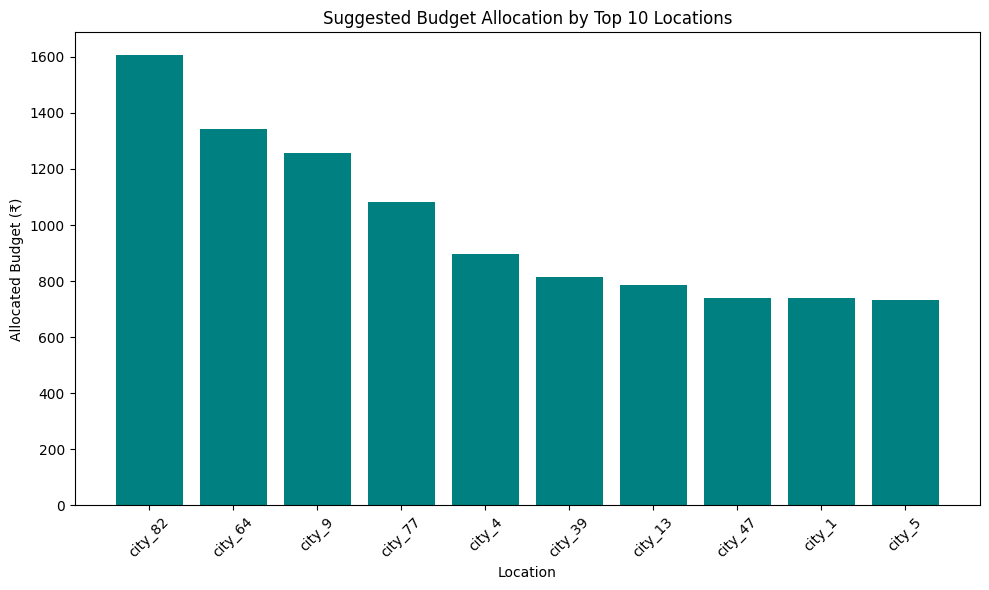

In [134]:
# Budgeting based on top-10 "College"
top_10_locations = pd.DataFrame({
    'Location': ['city_82', 'city_64', 'city_9', 'city_77', 'city_4', 'city_39', 'city_13', 'city_47', 'city_1', 'city_5'],
    'Number of Leads': [500, 450, 600, 550, 400, 350, 700, 300, 800, 450],
})

# Defining conversion rates and costs per location
conversion_rates_location = {
    'city_82': 0.0505, 'city_64': 0.0423, 'city_9': 0.0394, 'city_77': 0.034, 'city_4': 0.0282,
    'city_39': 0.0256, 'city_13': 0.0247, 'city_47': 0.0232, 'city_1': 0.0232, 'city_5': 0.0229,
}
costs_per_location = {
    'city_82': 80, 'city_64': 90, 'city_9': 70, 'city_77': 85, 'city_4': 75,
    'city_39': 80, 'city_13': 95, 'city_47': 65, 'city_1': 60, 'city_5': 55,
}

# Step 3: Calculating potential conversions and budget per location
top_10_locations['Conversion Rate'] = top_10_locations['Location'].map(conversion_rates_location)
top_10_locations['Cost per Lead'] = top_10_locations['Location'].map(costs_per_location)
top_10_locations['Potential Conversions'] = top_10_locations['Number of Leads'] * top_10_locations['Conversion Rate']
top_10_locations['Budget Needed'] = top_10_locations['Number of Leads'] * top_10_locations['Cost per Lead']

# Step 4: Allocate a marketing budget based on location-specific ROI and conversions
total_budget = 10000  # Define total marketing budget
top_10_locations['ROI'] = top_10_locations['Potential Conversions'] / top_10_locations['Budget Needed']
top_10_locations['Proportional Budget'] = (
    (top_10_locations['ROI'] + top_10_locations['Conversion Rate']) /
    (top_10_locations['ROI'] + top_10_locations['Conversion Rate']).sum()
) * total_budget

# Step 5: Summarize suggested budget allocation
print("Budget Allocation for Top 10 Locations:")
print(top_10_locations[['Location', 'Proportional Budget']])

# Step 6: Visualize the budget allocation
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['Location'], top_10_locations['Proportional Budget'], color='teal')
plt.xlabel('Location')
plt.ylabel('Allocated Budget (₹)')
plt.title('Suggested Budget Allocation by Top 10 Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()